### Programm #6. HashTable  



Written by: Kovalev Alexander  
Department:  MSU, Physics Faculty, Mathematical Modelling and Computer Sciencegr(MMCS), gr. 435    
  
  
Task: Compare perfomance hash functions

Implement two frequency dictionary on different hash functions
- FNV64
- microsoft with shift mfc

Compare their performance, plotted follow graph:
- x axis: load factor
- y axis: number of collisions

In [1]:
import re
import string
import matplotlib.pyplot as plt
import numpy as np
import random 
import seaborn as sns; sns.set()

In [2]:
import seaborn as sns; sns.set()

In [3]:
class Node():
    """key and value and forward
    linked list"""
    def __init__(self, key=None):
        self.forward = None
        self.key = key
        self.value = 1
        
    
    def add(self, other_node):
        """Output: is there collision or ok?
        1 --it was
        0 --no collision for new word
        """
        #collision = 0
        if self.key and self.key != other_node.key:
            if self.forward is None:
                self.forward = other_node 
            else:
                self.forward.add(other_node)
        elif self.key == other_node.key:
            self.value += 1
        else:
            self.key = other_node.key
        
    def lenght_chain(self):
        """if None is key than output is 0"""
        if self.key is None:
            return 0
        lenght = 1
        next_item = self.forward
        while next_item:
            lenght +=1
            next_item = next_item.forward 
        return lenght

    def show_list(self):
        print(self.key, self.value)
        if self.forward:
            self.forward.show_list()
        

#### Реализация словаря на разных  хеш_функциях


In [4]:
import numpy as np


In [5]:
def microsoft_hash(string):
    hash_num = 8039
    for char in string[1:]: #here may be string[1:]
        hash_num = (hash_num << 5) + hash_num + ord(char)
    return hash_num 

def fnv_64(string):
    #FNV_prime = 1099511628211   # for 64 bit FNV
    FNV_prime = 8039
    hash_num = 14695981039346656037 # offst for 64 bit FNV
    for char in string[1:]:
        hash_num = hash_num * FNV_prime
        hash_num = hash_num ^ ord(char)    # xor ~ ^
    return hash_num

In [6]:


# def my_hash(string):
#     hash_num = 8039
#     for char in string[1:]:
#         hash_num += ord(char)    # xor ~ ^
#     return hash_num

In [7]:
class HashTable:
    def __init__(self, size, hash_name):
        self.hash_name = hash_name
        self.size = size
        self.array = [Node() for i in range(self.size)]
        self.lenghts_chain = [0]*self.size
        self.num_collisions = 0
        self.unique_words = 0
        self.num_empty_item = size

    def put(self,key):
        hashvalue = self.hashfunction(key,len(self.array))
        tmp_node = Node(key)
        
        len_before = self.array[hashvalue].lenght_chain()
        self.array[hashvalue].add(tmp_node)
        self.lenghts_chain[hashvalue] = self.array[hashvalue].lenght_chain() 
        
        if len_before != 0:
            self.num_collisions += self.lenghts_chain[hashvalue] - len_before
        else:
            self.num_empty_item -= 1 
        
        self.unique_words += self.lenghts_chain[hashvalue] - len_before
        
        #we save lenghts of chains. aka number of collisions
        
        
        
    def get_num_empty_slot(self):
        return self.num_empty_item
    def get_new_collisions(self):
        return self.num_collisions
    def get_new_unique_words(self):
        return self.unique_words
    
    
    def get_collisions(self):
        num_collisions = 0
        
        for lenght in self.lenghts_chain:
            if lenght == 0:
                continue
            num_tmp = lenght-1
            num_collisions += num_tmp
        return num_collisions
    
    def get_load_factor(self):
        size = 0
        for lenght in self.lenghts_chain:
            size += lenght
        return size/self.size
    
    def get_loading_hash(self):
        size = 0
        for i in range(self.size):
            if self.lenghts_chain[i] == 0:
                size += 1
        return size/self.size
    
    def hashfunction(self, key, size):
        if self.hash_name == "fnv64":
            return fnv_64(key) &  (self.size-1)
        
        elif self.hash_name == 'microsoft':
            return (microsoft_hash(key)>>5) &  (self.size-1)
        
        elif self.hash_name == 'mode':
            return key%size
        elif self.hash_name =='myhash':
            return my_hash(key) &  ((self.size-1)<<5)
        else:
            print('I do not know this hash')






In [8]:
kant_file = open("Kritika.txt", "r")
data = kant_file.read() # len = 25507
kant_file.close()

def clean_txt(input_str):
    input_to_lower = input_str.lower() 
    input_no_digit = re.sub(r'\d+', '', input_to_lower) # without digits
    clean_input = input_no_digit.translate(str.maketrans("","", string.punctuation)) # clean punctuations
    return clean_input.split()

clean_data = clean_txt(data)
print("Количество слов {},\nКоличество символов {} \nКоличество уникальных слов {}".format(len(clean_data),len(data), len(set(clean_data))))

Количество слов 59822,
Количество символов 429317 
Количество уникальных слов 8037


In [9]:
size_text = len(set(clean_data)) # 8037
PRIME_unique = 8039


#### FNV64 hash

In [10]:
htable_fnv = HashTable(PRIME_unique, 'fnv64')
htable_microsoft = HashTable(PRIME_unique, 'microsoft')
htable_myhash = HashTable(PRIME_unique, 'myhash')

In [11]:
def evaluation_hash_table(htable):
    collisions = [0] * len(clean_data)
    load_factors = [0] * len(clean_data)
    loading_hash = [0] * len(clean_data)
    i = 0
    for word in clean_data[:len(clean_data)]:
        htable.put(word)
        collisions[i] = htable.get_new_collisions()
        load_factors[i] = htable.get_new_unique_words()/PRIME_unique
        loading_hash[i] = (PRIME_unique - htable.get_num_empty_slot())/PRIME_unique
        i += 1
    return collisions, load_factors, loading_hash


In [12]:
collisions_fnv, load_factors_fnv, loading_hash_fnv = evaluation_hash_table(htable_fnv)
print('FNV completed')
collisions_microsoft, load_factors_microsoft, loading_hash_microsoft = evaluation_hash_table(htable_microsoft)
print('Microsoft completed')
# collisions_myhash, load_factors_myhash = evaluation_hash_table(htable_myhash)
# print('Myhash completed')

FNV completed
Microsoft completed


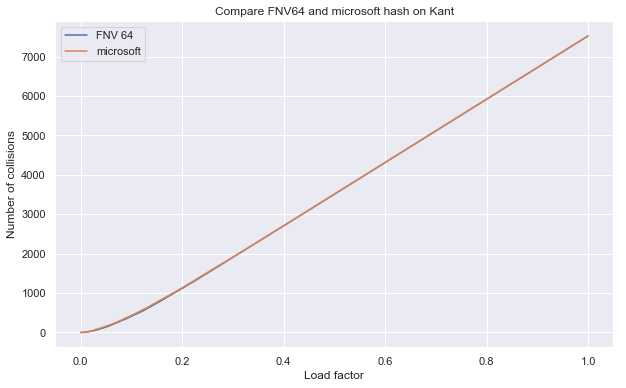

In [13]:
plt.figure(figsize = (10,6))

plt.plot(load_factors_fnv, collisions_fnv, label = 'FNV 64')
plt.plot(load_factors_microsoft, collisions_microsoft, label = 'microsoft')


#text stuff
plt.title("Compare FNV64 and microsoft hash on Kant")
plt.xlabel("Load factor")
plt.ylabel("Number of collisions")
# plt.xlim(0.4,0.6)
# plt.ylim(2000,4500)
plt.legend()

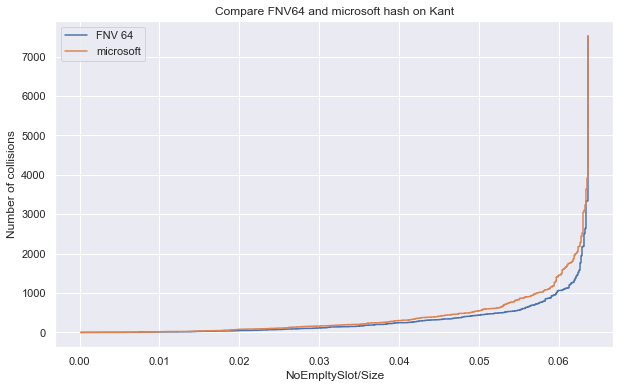

In [14]:
plt.show()
plt.figure(figsize = (10,6))

plt.plot(loading_hash_fnv, collisions_fnv, label = 'FNV 64')
plt.plot(loading_hash_microsoft, collisions_microsoft, label = 'microsoft')



#text stuff
plt.title("Compare FNV64 and microsoft hash on Kant")
plt.xlabel("NoEmpltySlot/Size")
plt.ylabel("Number of collisions")

plt.legend()

Look on lenght of chain in hash_table

In [15]:
def take_lenghts_chains(htable):
    mas = []
    for i in htable.lenghts_chain:
        mas.append(i)
    return mas


In [16]:
chains_fnv = take_lenghts_chains(htable_fnv)
chains_microsoft = take_lenghts_chains(htable_microsoft)
chains_myhash = take_lenghts_chains(htable_myhash)

(0, 150)

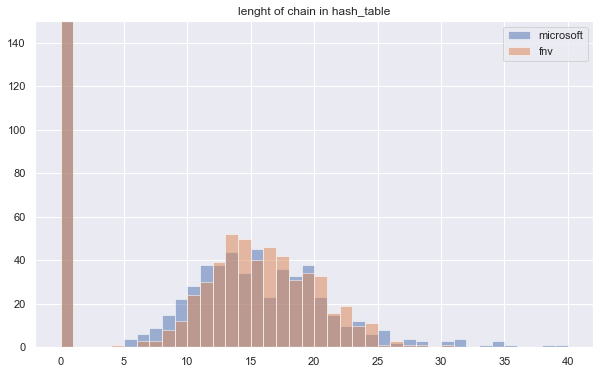

In [17]:
plt.figure(figsize = (10,6))
plt.title('lenght of chain in hash_table')
plt.hist(chains_microsoft,range =(0,40),bins = 40, alpha=0.5, label = 'microsoft')
plt.hist(chains_fnv,range =(0,40),bins = 40, alpha=0.5, label = 'fnv')


plt.legend()
plt.ylim(0,150)